

# Project: Analyising Suicide data and if it has relation to the country's economics and standard of living

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
By gathering and combining several Datasets(individual indicators) from GAPMINDER into one useable and clean Dataset in a specific timeframe(2006:2016). first, we're going to use the Suicide cases and the population inindicators to identify the suicide rate since the data for the suicide rate in gapminder is not complete and invistigate it at a closer look. then we are going to use the GPD/per capta and the HDI (human develpment index) as indicators for the standard of living and economy for each country and see if there is any correlation between them and the suicide rate in each country. 


In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#reading our data sets
pop_raw=pd.read_csv('population_total.csv')
suicide_raw=pd.read_csv('suicide_total_deaths.csv')
hdi_raw=pd.read_csv('hdi_human_development_index.csv')
gpd_raw=pd.read_csv('gdppercapita_us_inflation_adjusted.csv')

gpd_raw.head(3)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,543,529.0,576.0,588.0,584.0,574.0,571.0,572.0,568.0,571.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4860.0,5070.0,5210.0
2,Algeria,2480.0,2090.0,1640.0,2150.0,2210.0,2290.0,2120.0,2260.0,2430.0,...,4480,4520.0,4590.0,4620.0,4700.0,4780.0,4830.0,4790.0,4760.0,4710.0


In here we find a sample of the datasets we have. to be more accurate we are going to pick a recent specific time frame, that would give the best results for the data we have. 
we are going to need to decide a specific time frame

In [3]:
print(pop_raw.columns[1]+' '+pop_raw.columns[-1])
print(suicide_raw.columns[1]+' '+suicide_raw.columns[-1])
print(hdi_raw.columns[1]+' '+hdi_raw.columns[-1])
print(gpd_raw.columns[1]+' '+gpd_raw.columns[-1])

1800 2100
1990 2016
1990 2018
1960 2019


We are going to choose data from 2006 to 2016

In [4]:
#structure of the datasets
print(suicide_raw.shape)
print(pop_raw.shape)
print(hdi_raw.shape)
print(gpd_raw.shape)

(187, 28)
(195, 302)
(188, 30)
(191, 61)


Because the shape of the data, it would be hard to merge the datasets together. so reshaping the data into a more appealing way is in need.

In [5]:
#Number of countries in each dataset
print(suicide_raw.country.nunique())
print(pop_raw.country.nunique())
print(hdi_raw.country.nunique())
print(gpd_raw.country.nunique())

187
195
188
191


In [6]:
suicide_raw.country.nunique()==pop_raw.country.nunique()

False

Second major problem would be that each set has diffrerent countries value, so merging them would be an issue.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [7]:
#slicing the time frame from 2006 to 2016
suicide_fixed=suicide_raw.loc[:,'2006':'2016']
#taking the country column and putting it as first column
suicide_fixed.insert(0, 'country', suicide_raw['country'])
suicide_fixed

,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,1650.00,1680.00,1710.00,1750.00,1760.00,1810.00,1870.00,1990.00,2080.00,2170.00,2250.00
1,Albania,204.00,204.00,205.00,201.00,195.00,191.00,188.00,186.00,184.00,183.00,181.00
2,Algeria,1220.00,1240.00,1250.00,1270.00,1290.00,1310.00,1340.00,1370.00,1410.00,1420.00,1440.00
3,Andorra,7.19,7.39,7.53,7.67,7.76,7.85,7.92,7.97,7.72,7.78,7.84
4,Angola,1010.00,1040.00,1060.00,1080.00,1100.00,1120.00,1140.00,1170.00,1200.00,1220.00,1230.00
...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,2460.00,2560.00,2640.00,2680.00,2610.00,2660.00,2780.00,2760.00,2840.00,2920.00,2970.00
183,Vietnam,7400.00,7360.00,7340.00,7390.00,7430.00,7480.00,7530.00,7590.00,7640.00,7680.00,7740.00
184,Yemen,962.00,997.00,1030.00,1070.00,1110.00,1160.00,1210.00,1260.00,1320.00,1390.00,1450.00
185,Zambia,1080.00,1100.00,1120.00,1140.00,1170.00,1210.00,1240.00,1270.00,1300.00,1340.00,1380.00


Here we trimmed one of our datasets to our desired time frame 

In [8]:
#reshaping our dataset using melt function
suicide_fixed=pd.melt(suicide_raw, id_vars=['country'], value_vars=['2006', '2007','2008','2009', '2010','2011','2012', '2013','2014','2015','2016'])

In [9]:
#renaming the new columns
suicide_fixed.rename(columns={'variable': 'year','value':'Suicides'}, inplace=True)
suicide_fixed

,country,year,Suicides
0,Afghanistan,2006,1650.00
1,Albania,2006,204.00
2,Algeria,2006,1220.00
3,Andorra,2006,7.19
4,Angola,2006,1010.00
...,...,...,...
2052,Venezuela,2016,2970.00
2053,Vietnam,2016,7740.00
2054,Yemen,2016,1450.00
2055,Zambia,2016,1380.00


Now we have a clean and a more approachable dataset that we can do analysis on and merge with other datasets

In [10]:
#repeating the same steps on population dataset
pop_fixed=pop_raw.loc[:,'2006':'2016']
pop_fixed.insert(0, 'country', pop_raw['country'])
pop_fixed=pd.melt(pop_fixed, id_vars=['country'], value_vars=['2006', '2007','2008','2009', '2010','2011','2012', '2013','2014','2015','2016'])
pop_fixed.rename(columns={'variable': 'year','value':'population'}, inplace=True)
pop_fixed

,country,year,population
0,Afghanistan,2006,26400000
1,Albania,2006,3060000
2,Algeria,2006,33600000
3,Andorra,2006,81000
4,Angola,2006,20100000
...,...,...,...
2140,Venezuela,2016,29900000
2141,Vietnam,2016,93600000
2142,Yemen,2016,27200000
2143,Zambia,2016,16400000


Now the pop_fixed dataframe is in the same formate as the suicide_fixed Dataframe

In [11]:
#repeating the same steps on HDI dataset
hdi_fixed=hdi_raw.loc[:,'2006':'2016']
hdi_fixed.insert(0, 'country', hdi_raw['country'])
hdi_fixed=pd.melt(hdi_fixed, id_vars=['country'], value_vars=['2006', '2007','2008','2009', '2010','2011','2012', '2013','2014','2015','2016'])
hdi_fixed.rename(columns={'variable': 'year','value':'hdi'}, inplace=True)
hdi_fixed

,country,year,hdi
0,Afghanistan,2006,0.419
1,Albania,2006,0.709
2,Algeria,2006,0.699
3,Andorra,2006,0.829
4,Angola,2006,0.466
...,...,...,...
2063,Venezuela,2016,0.752
2064,Vietnam,2016,0.685
2065,Yemen,2016,0.477
2066,Zambia,2016,0.580


In [12]:
#repeating the same steps on GPD dataset
gpd_fixed=gpd_raw.loc[:,'2006':'2016']
gpd_fixed.insert(0, 'country', gpd_raw['country'])
gpd_fixed=pd.melt(gpd_fixed, id_vars=['country'], value_vars=['2006', '2007','2008','2009', '2010','2011','2012', '2013','2014','2015','2016'])
gpd_fixed.rename(columns={'variable': 'year','value':'gpd'}, inplace=True)
gpd_fixed

,country,year,gpd
0,Afghanistan,2006,365.0
1,Albania,2006,3260.0
2,Algeria,2006,4300.0
3,Andorra,2006,47800.0
4,Angola,2006,3100.0
...,...,...,...
2096,Venezuela,2016,NaN
2097,Vietnam,2016,1750.0
2098,Yemen,2016,694.0
2099,Zambia,2016,1650.0


Now we reshaped all the datasets we gathered 

In [13]:
#finding the different countries of two data sets
uni1=pop_fixed.country.unique()                        #all countries in pop set
uni2=suicide_fixed.country.unique()                    #all countries in suicide set
l=list(set(uni1).symmetric_difference(set(uni2)))      #countries that only exist in one set
l

['San Marino',
 'Liechtenstein',
 'Nauru',
 'Palau',
 'Monaco',
 'Tuvalu',
 'St. Kitts and Nevis',
 'Holy See']

now we have a list with countries that only exist in one set

In [14]:
#removing the different countries in one dataset
for con in range(len(l)):
    x=pop_fixed[pop_fixed.country == l[con]]  #getting the index of every country in the list in the pop data set for every year
    print(x.index)                            
    pop_fixed.drop(x.index,inplace=True)      #dropping these indexes from the pop data set

Int64Index([146, 341, 536, 731, 926, 1121, 1316, 1511, 1706, 1901, 2096], dtype='int64')
Int64Index([98, 293, 488, 683, 878, 1073, 1268, 1463, 1658, 1853, 2048], dtype='int64')
Int64Index([120, 315, 510, 705, 900, 1095, 1290, 1485, 1680, 1875, 2070], dtype='int64')
Int64Index([132, 327, 522, 717, 912, 1107, 1302, 1497, 1692, 1887, 2082], dtype='int64')
Int64Index([113, 308, 503, 698, 893, 1088, 1283, 1478, 1673, 1868, 2063], dtype='int64')
Int64Index([181, 376, 571, 766, 961, 1156, 1351, 1546, 1741, 1936, 2131], dtype='int64')
Int64Index([163, 358, 553, 748, 943, 1138, 1333, 1528, 1723, 1918, 2113], dtype='int64')
Int64Index([73, 268, 463, 658, 853, 1048, 1243, 1438, 1633, 1828, 2023], dtype='int64')


In [15]:
print (pop_fixed.country.nunique())
print (suicide_fixed.country.nunique())

187
187


Now both the Datasets have the same number and identical lineup of countries so they can be merged together flawlessly

In [16]:
all_data=pd.merge(pop_fixed,suicide_fixed)
all_data

,country,year,population,Suicides
0,Afghanistan,2006,26400000,1650.00
1,Albania,2006,3060000,204.00
2,Algeria,2006,33600000,1220.00
3,Andorra,2006,81000,7.19
4,Angola,2006,20100000,1010.00
...,...,...,...,...
2052,Venezuela,2016,29900000,2970.00
2053,Vietnam,2016,93600000,7740.00
2054,Yemen,2016,27200000,1450.00
2055,Zambia,2016,16400000,1380.00


Both the datasets have been successfully merged into one dataset. now its time to do the same steps for the rest of the datasets

In [17]:
#finding the ratio of suicide per 100k for each row
for c in range(2057):
    all_data['suicide_per_100k']=(all_data['Suicides']/all_data['population'])*100000    #formula for the ratio
all_data

,country,year,population,Suicides,suicide_per_100k
0,Afghanistan,2006,26400000,1650.00,6.250000
1,Albania,2006,3060000,204.00,6.666667
2,Algeria,2006,33600000,1220.00,3.630952
3,Andorra,2006,81000,7.19,8.876543
4,Angola,2006,20100000,1010.00,5.024876
...,...,...,...,...,...
2052,Venezuela,2016,29900000,2970.00,9.933110
2053,Vietnam,2016,93600000,7740.00,8.269231
2054,Yemen,2016,27200000,1450.00,5.330882
2055,Zambia,2016,16400000,1380.00,8.414634


In [18]:
def diff(df1,df2):             #function to get a list of all different countries that only exist in one dataset
    global l
    uni1=df1.country.unique()
    uni2=df2.country.unique()
    l=list(set(uni1).symmetric_difference(set(uni2)))
    return l
def removing(df1,df2):         #function to find the indexes of these countries and remove it from the datasets (if it exist in one dataset)
    for con in range(len(l)):
        x=df1[df1.country == l[con]]
        print(x.index)
        df1.drop(x.index,inplace=True)
    for con in range(len(l)):  # i added an extra for loop here to remove the countries that only exist in the original merged dataset      
        x=df2[df2.country == l[con]]
        print(x.index)
        df2.drop(x.index,inplace=True)

Insted of repeating the same codes again(like the reshaping steps). to find and remove the different countries for the rest of the datasets i'm going to make a function instead, of the same code i used to instanly apply it to the other remaining datasets to merge them with.

In [19]:
diff(all_data,gpd_fixed) #different countries in each data set

['San Marino',
 'Liechtenstein',
 'Somalia',
 'Syria',
 'Nauru',
 'Palau',
 'Monaco',
 'North Korea',
 'Tuvalu',
 'St. Kitts and Nevis']

list of different countries in both data sets

In [20]:
removing(all_data,gpd_fixed) #dropping the indexes of every different country in BOTH datasets

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([151, 338, 525, 712, 899, 1086, 1273, 1460, 1647, 1834, 2021], dtype='int64')
Int64Index([163, 350, 537, 724, 911, 1098, 1285, 1472, 1659, 1846, 2033], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([123, 310, 497, 684, 871, 1058, 1245, 1432, 1619, 1806, 1993], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([144, 335, 526, 717, 908, 1099, 1290, 1481, 1672, 1863, 2054], dtype='int64')
Int64Index([97, 288, 479, 670, 861, 1052, 1243, 1434, 1625, 1816, 2007], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([119, 310, 501, 692, 883, 1074, 1265, 1456, 1647, 1838, 2029], dtype='int64')
Int64Index([130, 321, 512, 703, 894, 1085, 1276, 1467, 1658, 1849, 2040], dtype='int64')
Int64Index([112, 303, 494, 685, 876, 1067, 1258, 1449, 1640, 1831, 2022], dtype='int64')
Int64Index([], dtyp

Indexes of the different countries that got removed that existed in either data set. countries got removed from both datasets not just one 

In [21]:
print (gpd_fixed.country.nunique())
print (all_data.country.nunique())

184
184


now both the merged dataset and the GPD dataset can be merged

In [22]:
all_data=pd.merge(all_data,gpd_fixed)
all_data

,country,year,population,Suicides,suicide_per_100k,gpd
0,Afghanistan,2006,26400000,1650.00,6.250000,365.0
1,Albania,2006,3060000,204.00,6.666667,3260.0
2,Algeria,2006,33600000,1220.00,3.630952,4300.0
3,Andorra,2006,81000,7.19,8.876543,47800.0
4,Angola,2006,20100000,1010.00,5.024876,3100.0
...,...,...,...,...,...,...
2019,Venezuela,2016,29900000,2970.00,9.933110,NaN
2020,Vietnam,2016,93600000,7740.00,8.269231,1750.0
2021,Yemen,2016,27200000,1450.00,5.330882,694.0
2022,Zambia,2016,16400000,1380.00,8.414634,1650.0


In [23]:
#finding different countries in datasets
diff(all_data,hdi_fixed) #different countries in each data set

['Liechtenstein', 'Syria', 'Palau', 'St. Kitts and Nevis']

In [24]:
#removing different countries
removing(all_data,hdi_fixed) #dropping the indexes of every different country in BOTH datasets

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([97, 285, 473, 661, 849, 1037, 1225, 1413, 1601, 1789, 1977], dtype='int64')
Int64Index([164, 352, 540, 728, 916, 1104, 1292, 1480, 1668, 1856, 2044], dtype='int64')
Int64Index([128, 316, 504, 692, 880, 1068, 1256, 1444, 1632, 1820, 2008], dtype='int64')
Int64Index([157, 345, 533, 721, 909, 1097, 1285, 1473, 1661, 1849, 2037], dtype='int64')


The different countries only existed in the hdi dataset so nothing was removed from the merged dataset

In [25]:
#merging datasets
all_data=pd.merge(all_data,hdi_fixed)
all_data

,country,year,population,Suicides,suicide_per_100k,gpd,hdi
0,Afghanistan,2006,26400000,1650.00,6.250000,365.0,0.419
1,Albania,2006,3060000,204.00,6.666667,3260.0,0.709
2,Algeria,2006,33600000,1220.00,3.630952,4300.0,0.699
3,Andorra,2006,81000,7.19,8.876543,47800.0,0.829
4,Angola,2006,20100000,1010.00,5.024876,3100.0,0.466
...,...,...,...,...,...,...,...
2019,Venezuela,2016,29900000,2970.00,9.933110,NaN,0.752
2020,Vietnam,2016,93600000,7740.00,8.269231,1750.0,0.685
2021,Yemen,2016,27200000,1450.00,5.330882,694.0,0.477
2022,Zambia,2016,16400000,1380.00,8.414634,1650.0,0.580


In [26]:
#dropping all non existing values
all_data.dropna(inplace=True)

In [27]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2023
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           1987 non-null   object 
 1   year              1987 non-null   object 
 2   population        1987 non-null   int64  
 3   Suicides          1987 non-null   float64
 4   suicide_per_100k  1987 non-null   float64
 5   gpd               1987 non-null   float64
 6   hdi               1987 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 124.2+ KB


Now the datasets have been combined and cleaned and ready to be analysed

<a id='eda'></a>
## Exploratory Data Analysis


### looking closer at every country suicide rate

In [28]:
df_mean=all_data.groupby('country').mean().drop('population',axis=1)
df_mean.head(10)

,Suicides,suicide_per_100k,gpd,hdi
country,,,,
Afghanistan,1883.636364,6.170127,512.363636,0.463182
Albania,192.909091,6.540323,4089.090909,0.754000
Algeria,1323.636364,3.594230,4546.363636,0.731273
Andorra,7.692727,9.433288,42681.818182,0.838727
Angola,1124.545455,4.651008,3595.454545,0.523727
Antigua and Barbuda,2.039091,2.293062,14063.636364,0.772818
Argentina,4763.636364,11.514311,10242.727273,0.817818
Armenia,236.363636,8.125263,3510.909091,0.733636
Australia,2652.727273,11.811139,52900.000000,0.924273


df for the mean for every country from 2006 to 2016

In [29]:
df_mean.describe()

,Suicides,suicide_per_100k,gpd,hdi
count,183.000000,183.000000,183.000000,183.000000
mean,4422.710554,10.337245,12738.063524,0.683515
std,20371.120612,7.346450,18166.967243,0.156201
min,2.039091,1.747117,232.363636,0.327636
25%,182.590909,5.393824,1402.272727,0.547364
50%,631.727273,8.066609,4890.909091,0.713364
75%,2056.363636,13.130363,14122.727273,0.800682
max,222727.272727,41.403098,106181.818182,0.942455


Descriptive statistics of the mean for the countries of the time period

In [30]:
all_data.groupby('country').suicide_per_100k.mean()

country
Afghanistan     6.170127
Albania         6.540323
Algeria         3.594230
Andorra         9.433288
Angola          4.651008
                 ...    
Venezuela       9.363542
Vietnam         8.441081
Yemen           4.917856
Zambia          8.603973
Zimbabwe       15.606148
Name: suicide_per_100k, Length: 183, dtype: float64

The mean of the suicide ratio for countries from 2006 to 2016

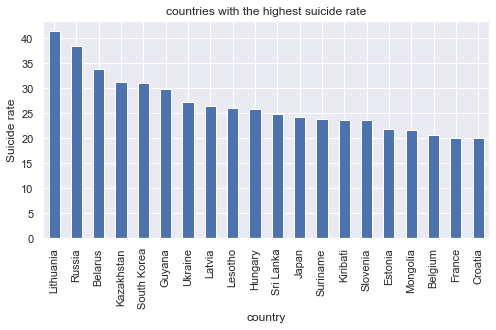

In [51]:
all_data.groupby('country').suicide_per_100k.mean().nlargest(20).plot(kind='bar',figsize=(8,4))
plt.title('countries with the highest suicide rate')
plt.ylabel('Suicide rate');

Bar chart of the top 20 countries with highest suicide per 100k pop from 2006 to 2016

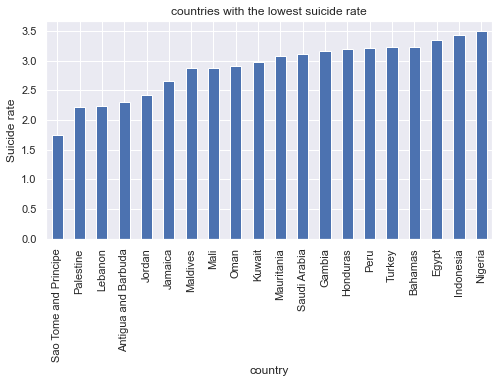

In [50]:
all_data.groupby('country').suicide_per_100k.mean().nsmallest(20).plot(kind='bar',figsize=(8,4))
plt.title('countries with the lowest suicide rate')
plt.ylabel('Suicide rate');

Bar chart of the top 20 countries with lowest suicide per 100k pop from 2006 to 2016

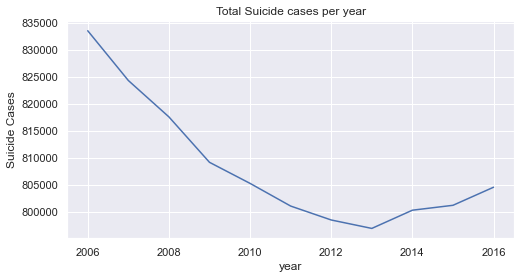

In [52]:
all_data['Suicides'].groupby(all_data.year).sum().plot(figsize=(8,4))
plt.title('Total Suicide cases per year')
plt.ylabel('Suicide Cases');

The change of suicide cases over the time period

### Does a country's living standards and economy have an effect on suicide?

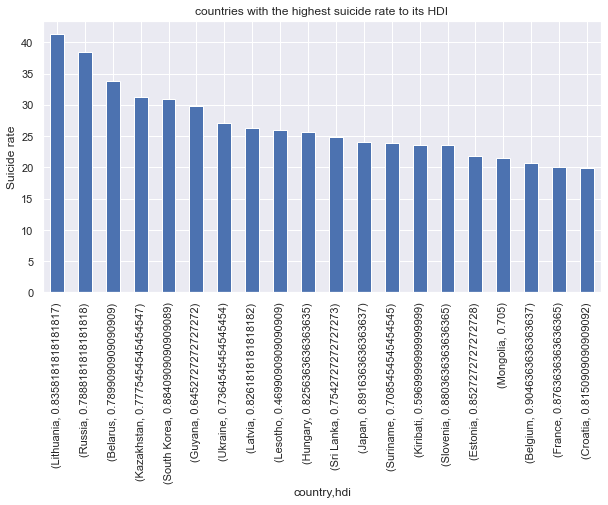

In [54]:
df_mean.groupby(['country','hdi']).suicide_per_100k.mean().nlargest(20).plot(kind='bar',figsize=(10,5))
plt.title('countries with the highest suicide rate to its HDI')
plt.ylabel('Suicide rate');

Highest countries with thier respective hdi

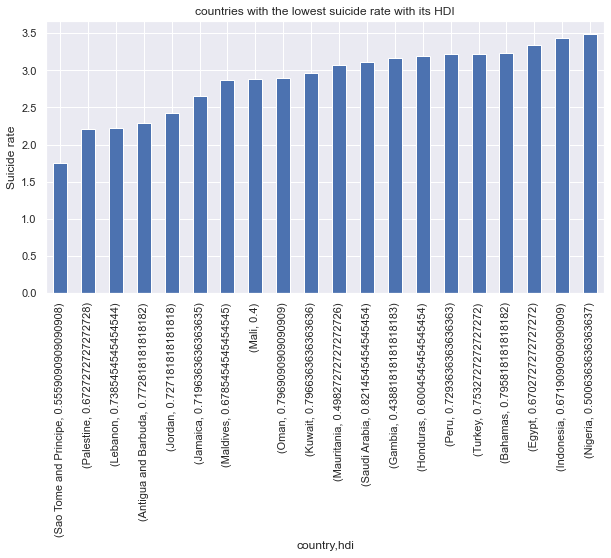

In [55]:
df_mean.groupby(['country','hdi']).suicide_per_100k.mean().nsmallest(20).plot(kind='bar',figsize=(10,5))
plt.title('countries with the lowest suicide rate with its HDI')
plt.ylabel('Suicide rate');

Lowest countries with thier respective hdi

In [36]:
df_mean.describe()

,Suicides,suicide_per_100k,gpd,hdi
count,183.000000,183.000000,183.000000,183.000000
mean,4422.710554,10.337245,12738.063524,0.683515
std,20371.120612,7.346450,18166.967243,0.156201
min,2.039091,1.747117,232.363636,0.327636
25%,182.590909,5.393824,1402.272727,0.547364
50%,631.727273,8.066609,4890.909091,0.713364
75%,2056.363636,13.130363,14122.727273,0.800682
max,222727.272727,41.403098,106181.818182,0.942455


In [37]:
df_mean.groupby(['country','hdi']).suicide_per_100k.mean().nlargest(20)

country      hdi     
Lithuania    0.835818    41.403098
Russia       0.788818    38.449451
Belarus      0.789909    33.839552
Kazakhstan   0.777545    31.249986
South Korea  0.884091    30.982851
Guyana       0.645273    29.844587
Ukraine      0.736455    27.109386
Latvia       0.826182    26.364735
Lesotho      0.469909    25.917030
Hungary      0.825636    25.710796
Sri Lanka    0.754273    24.834611
Japan        0.891636    24.094818
Suriname     0.708545    23.863624
Kiribati     0.597000    23.578746
Slovenia     0.880364    23.527553
Estonia      0.852727    21.859193
Mongolia     0.705000    21.513440
Belgium      0.904636    20.680468
France       0.876364    20.052016
Croatia      0.815091    19.940250
Name: suicide_per_100k, dtype: float64

In [38]:
df_mean.groupby(['country','hdi']).suicide_per_100k.mean().nsmallest(20)

country                hdi     
Sao Tome and Principe  0.555909    1.747117
Palestine              0.672727    2.214549
Lebanon                0.738545    2.229827
Antigua and Barbuda    0.772818    2.293062
Jordan                 0.727182    2.425793
Jamaica                0.719636    2.656064
Maldives               0.678545    2.869890
Mali                   0.400000    2.881722
Oman                   0.796909    2.902344
Kuwait                 0.796636    2.967477
Mauritania             0.498273    3.068484
Saudi Arabia           0.821455    3.117357
Gambia                 0.438818    3.161357
Honduras               0.600455    3.188176
Peru                   0.729364    3.219209
Turkey                 0.753273    3.225731
Bahamas                0.795818    3.228119
Egypt                  0.670273    3.340314
Indonesia              0.671909    3.434693
Nigeria                0.500636    3.490376
Name: suicide_per_100k, dtype: float64

by observing the highest and lowest countries. half of the highest ratio countries falls in the third quartile in all the countries HDI while in the lowest ratio countries, only a single country falls in the third quartile of the HDI.

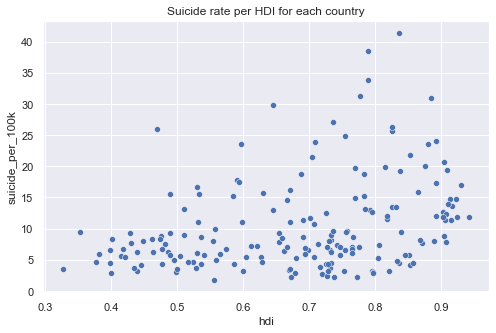

In [62]:
sns.set(rc={'figure.figsize':(8,5)})
sns.scatterplot("hdi","suicide_per_100k", data=df_mean)
plt.title('Suicide rate per HDI for each country');

The scatterplot between the suicide ratio and the HDI does not give any conceret visual analysis for the corralation between the two. as some countries can have high hdi and normal suicide ratio and other countries can have high hdi and high suicide ratio. although the latter might be more into the higher suicde ratio than the average compared to the low hdi countries

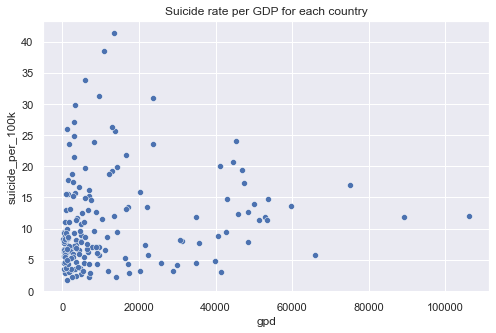

In [60]:
sns.scatterplot("gpd","suicide_per_100k", data=df_mean)
plt.title('Suicide rate per GDP for each country');

while the scatterplot between the gpd and suicide ratio does not have any correlation between the two

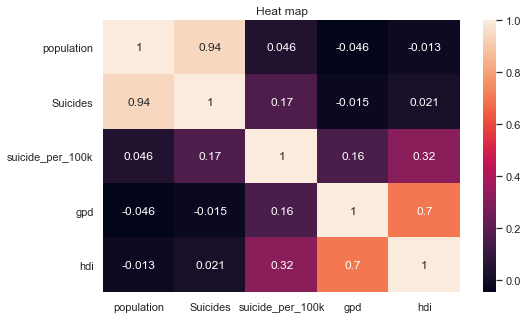

In [57]:
sns.heatmap(all_data.corr(), annot=True)
plt.title('Heat map');

<a id='conclusions'></a>
## Conclusions

after trying to see if a country HDI (human development index) or GPD per capita have any effect on it's suicide cases ratio. i have failed to get any concrete idea about any positive or negative correlation it might have as it seems most of them were random. even though in some high hdi countries 
can have more suicide ratio. its most likey the effect of other causes rather than the ones i tried to analyze. 

<a id='Limitations'></a>
## Limitaitons

♦ The data were taken from gapminder as several datasets    and combined together in the data wrapping part thus the connection between them was purely hypothetical.

♦ due to some NaN values in some countries in specific factors, some countries needed to be removed. 

♦ There was no concrete evidence gathered from this data to prove that one or more of these factors have an effect on the suicide rate. 